# Ways to improve
    1) preprocessing(increase gamma)
    2) transfer learning
    3) recurrent approach
    4) dataset improving
        a) data augmentation(recoloring, rotation)
        b) small window scaled up
        c) make better for recurrent(equal timing)
    5) fighting overfitting
    6) other loss function
    7) attention heatmap

In [1]:
import numpy as np
import os
import random
from functools import reduce

data = []
data_path = "D:\\Python\\Wormax_learn2\\preprocessed_data_local_notshuffled\\"

listdir = []
dirsOnly = reduce(lambda x,y: x and y, map(lambda x: os.path.isdir(data_path + x), os.listdir(data_path)))
if not dirsOnly:
    listdir = filter(lambda x: os.path.isfile, os.listdir(data_path))
else:
    for dir in os.listdir(data_path):
        listdir += map(lambda x: dir + "\\" + x, os.listdir(data_path + dir))
        
listdir = np.array(list(listdir))
random.shuffle(listdir)
for file_name in listdir:
    if len(data) > 4000:
        break
    if len(data) == 0:
        data = np.load(data_path + file_name)
    else:
        data = np.concatenate((data, np.load(data_path + file_name)))


In [2]:
print(data.shape)
print(data[0][0].shape)
print(data[0][1])
#print(np.swapaxes(data[0][0], 0,1).shape)

(10000, 2)
(100, 160, 3)
[0.24, -0.1, False]


<IPython.core.display.Javascript object>


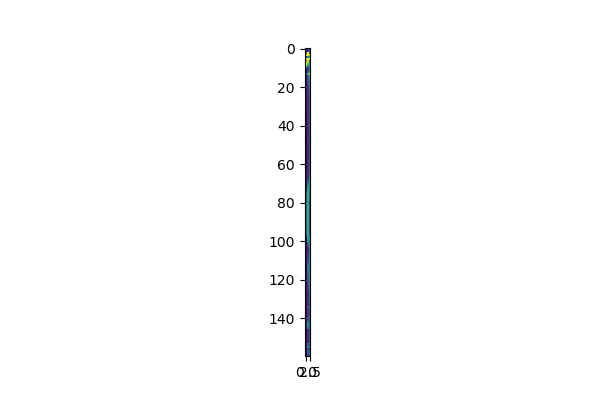

"\n# FOR 2 CHANNELS\n\n#create two subplots\ngridsize = (2, 1)\nfig = plt.figure(figsize=(6, 8))\nax1 = plt.subplot2grid(gridsize, (0, 0))\nax2 = plt.subplot2grid(gridsize, (1, 0))\n\n#create two image plots\nim1 = ax1.imshow(data[0][0][:,:,0], cmap='Greys_r')\nim2 = ax2.imshow(data[0][0][:,:,1], cmap='Greys_r')\n\ndef update(i):\n    print('ihthmg1.shape')\n    img1 = prepare_image(data[i][0])\n    print('img1.shape')\n    im1.set_data(img1[:,:,0])\n    im2.set_data(img1[:,:,1])\n\nani = FuncAnimation(plt.gcf(), update, interval=10)\nplt.show()"

In [5]:
%matplotlib notebook
import cv2
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from grabscreen import grab_screen
from image_preproc import preproc_img, prepare_image

gridsize = (1, 1)
fig = plt.figure(figsize=(6, 4))
ax1 = plt.subplot2grid(gridsize, (0, 0))

im1 = ax1.imshow(data[0][0])

def update(i):
    im1.set_data(data[i][0])
    #im1.set_data(preproc_img(grab_screen()))

ani = FuncAnimation(plt.gcf(), update, interval=50)
plt.show()
'''
# FOR 2 CHANNELS

#create two subplots
gridsize = (2, 1)
fig = plt.figure(figsize=(6, 8))
ax1 = plt.subplot2grid(gridsize, (0, 0))
ax2 = plt.subplot2grid(gridsize, (1, 0))

#create two image plots
im1 = ax1.imshow(data[0][0][:,:,0], cmap='Greys_r')
im2 = ax2.imshow(data[0][0][:,:,1], cmap='Greys_r')

def update(i):
    print('ihthmg1.shape')
    img1 = prepare_image(data[i][0])
    print('img1.shape')
    im1.set_data(img1[:,:,0])
    im2.set_data(img1[:,:,1])

ani = FuncAnimation(plt.gcf(), update, interval=10)
plt.show()'''

# Display heatmap

In [2]:
import numpy as np
data = np.load("D:\Python\Keras\Wormax\heatmap.npy")

In [3]:
data.shape

(1000, 100, 160, 3)

<IPython.core.display.Javascript object>


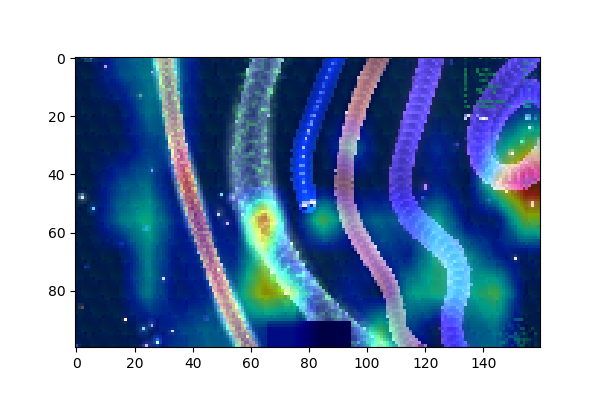

In [6]:
%matplotlib notebook
import cv2
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from grabscreen import grab_screen
from image_preproc import preproc_img, prepare_image

gridsize = (1, 1)
fig = plt.figure(figsize=(6, 4))
ax1 = plt.subplot2grid(gridsize, (0, 0))

im1 = ax1.imshow(data[0])

def update(i):
    im1.set_data(data[i])
    #im1.set_data(preproc_img(grab_screen()))

ani = FuncAnimation(plt.gcf(), update, interval=50)
plt.show()